<a href="https://colab.research.google.com/github/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/blob/main/01_Signal_Processing_Ciani%2BDalle_Rive_Prieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [174]:
# Data
import pandas as pd
# Math
import numpy as np
# Graficas
import matplotlib.pyplot as plt
# Manejo de directorios
import shutil
import os

# Funciones

Se cargan las funciones que se van a utilizar para el analisis de las señales.

In [175]:
def graficar_t_VS_muestras(tiempo, datos, xlabel='Tiempo (s)', ylabel='Amplitud',xlim=None, ylim=None, titulo='Gráfico', grid=True):
    """
    Función para graficar datos utilizando matplotlib.

    Args:
        tiempo (list or array): Datos del eje x (tiempo).
        datos (list or array): Datos del eje y (muestras).
        xlabel (str): Etiqueta para el eje x. Default 'Tiempo (s)'.
        ylabel (str): Etiqueta para el eje y. Default 'Valor'.
        titulo (str): Título del gráfico. Default 'Gráfico'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 7))
    plt.plot(tiempo, datos)
    plt.xlabel(xlabel)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)
    plt.show()

def fft(signals, fs, labels=None, xlim=None, ylim=None, xlabel='Frecuencia (Hz)', ylabel='Magnitud', titulo='Transformada de Fourier', grid=True):
    """
    Calcula y grafica la FFT de una o más señales.

    Args:
        signals (list of arrays): Lista de señales en el dominio del tiempo.
        fs (float): Frecuencia de muestreo.
        labels (list of str): Lista de etiquetas para las señales. Default None.
        xlim (tuple): Límites del eje x (min, max). Default None.
        ylim (tuple): Límites del eje y (min, max). Default None.
        xlabel (str): Etiqueta para el eje x. Default 'Frecuencia (Hz)'.
        ylabel (str): Etiqueta para el eje y. Default 'Magnitud'.
        titulo (str): Título del gráfico. Default 'Transformada de Fourier'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))

    # Si no se proporcionan etiquetas, crear etiquetas predeterminadas
    if labels is None:
        labels = [f'Señal {i+1}' for i in range(len(signals))]

    for i, signal in enumerate(signals):
        # Calcula la FFT de la señal
        fft_signal = np.fft.fft(signal)

        # Calcula la magnitud de la FFT
        magnitude = np.abs(fft_signal)

        # Calcula la frecuencia correspondiente a cada componente de la FFT
        freqs = np.fft.fftfreq(len(signal), 1/fs)

        # Solo usamos la mitad del espectro, ya que la otra mitad es simétrica
        half_n = len(signal) // 2
        frequencies = freqs[:half_n]
        magnitudes = magnitude[:half_n]

        # Graficar la magnitud de la FFT
        plt.plot(frequencies, magnitudes, label=labels[i])

    # Etiquetas y título
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Mostrar la leyenda
    plt.legend()

    plt.show()

    return frequencies, magnitudes

def graficar_multisignales(tiempos_list, datos_list, labels=None, xlabel='Tiempo (s)', ylabel='Amplitud', titulo='Multigráfico', grid=True):
    """
    Función para graficar múltiples señales en un solo gráfico utilizando matplotlib.

    Args:
        tiempos_list (list of arrays): Lista de vectores de tiempo, uno para cada señal.
        datos_list (list of arrays): Lista de señales (datos) a graficar.
        labels (list of str): Lista de etiquetas para cada señal. Default None.
        xlabel (str): Etiqueta para el eje x. Default 'Tiempo (s)'.
        ylabel (str): Etiqueta para el eje y. Default 'Amplitud'.
        titulo (str): Título del gráfico. Default 'Multigráfico'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))

    # Graficar cada señal con su respectivo vector de tiempo
    for i, (tiempos, datos) in enumerate(zip(tiempos_list, datos_list)):
        if labels and i < len(labels):
            plt.plot(tiempos, datos, label=labels[i])
        else:
            plt.plot(tiempos, datos)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    if labels:
        plt.legend()
    plt.grid(grid)
    plt.show()

def calcular_energia_dom_temp(senal):
    """
    Calcula la energía de una señal discreta.

    Parámetros:
    senal (array-like): La señal discreta en forma de lista o numpy array.

    Retorna:
    float: La energía de la señal.
    """
    # Convierte la señal a un array de numpy por si no lo es
    senal = np.array(senal)

    # Calcula la energía como la suma del cuadrado de los valores de la señal
    energia = np.sum(senal ** 2)

    return energia

def calcular_energia_dom_freq(senal):
    """
    Calcula la energía de una señal en el dominio de la frecuencia.

    Parámetros:
    senal (array-like): La fft en forma de lista o numpy array.

    Retorna:
    float: La energía de la señal.
    """
    N = len(senal)
    # Convierte la señal a un array de numpy por si no lo es
    senal = np.array(senal)

    # Calcula la energía como la suma del cuadrado de lso valores absolutos y divido por N
    energia = np.sum(np.abs(senal) ** 2) / N

    return energia

def calc_frec_acum_energ(porc, energia_total, freqs, mags):
    # Calcula la energía total acumulada deseada
    energia_lim = porc * energia_total / 100

    sum_energy = 0
    N = len(freqs)

    for i in range(N):  # Se puede usar solo range(N)
        sum_energy += (1/N) * abs(mags[i])**2
        if sum_energy >= energia_lim:
            break

    # Retorna la frecuencia correspondiente y la energía acumulada
    return freqs[i], sum_energy




# Información de la LDR

Un fotoresistor o LDR (light-dependent resistor),está conformado por un semicondiuctor (sulfuro de Cadmio) el cual al recibir los fotones incidentes de la luz, provoca que los electrones pasen a la banda de conducción, disminuyendo así, la resistencia del componenete.

La resistencia de estos componentes suele variar entre: 50 ohms (plena luz) y 1M ohms (oscuridad).  

En cuanto a la medición de la iluminancia, éste sensor no sería preciso debido a su gran variación de resistencia respecto a la temperatura y a la longitud de onda de la señal:

# Proceso de toma de la señal

A través del archivo brindado por la cátedra, se crearon 3 videos. Estos videos estan formados por imágenes que varían su color en una escala de grises. Se seleccionaron 60 fps para las 3 señales, y cada una varía en la cantidad de imágenes que utilizan para realizar el video. Se crearon señales con 10, 30 y 60 imágenes. La frecuencia es de 100Hz.

Dicha variación en el video se obtuvo a través de un fotorresistor, el cual fue colocado sobre la pantalla que reproducía el video, y con la habitación a oscuras, para garantizar una mejor toma de la señal. Es importante destacar que el monitor, tambien es de 60 FPS. Modelo: LG22MP55.

Una vez obtenidas las 3 señales, se cargaron a GitHub para luego poder importarlas a Google Colab.

Posteriormente, se volvió a realizar el mismo procedimiento pero a 500Hz ya que 100Hz resultaba una frecuencia baja para lo minimo requerido que es 120Hz.



Para probar experimentalmente que la frecuencia de muestreo es realmente de 500 Hz, habilitamos y deshabilitamos una salida sigital del ESP32. Es por ello que, para 500 Hz deberíamos ver 2ms entre cambio de flancos y 4ms en un período completo:

<img src="https://github.com/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/blob/main/Resources_signal_project/03.Osciloscopio_T_4ms.jpg?raw=true" alt="Tiempo entre flancos 2 ms" width=800px height=400px align=center>

<img src="https://github.com/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/blob/main/Resources_signal_project/02.Osciloscopio_2ms.jpg?raw=true" alt="T = 4 ms" width=800px height=400px>


# Importación de la señal

In [176]:
# Path del repo en la carpeta de drive
repo_path = 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'

if os.path.exists(repo_path):
    shutil.rmtree(repo_path)

# Clonamos el repo para descargar las muestras
!git clone https://github.com/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto

Cloning into 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 148 (delta 57), reused 88 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (148/148), 3.20 MiB | 4.47 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [177]:
data_1 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/08-ldr-fs_100Hz-60imgs-60fps.json")
data_2 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/06-ldr-fs_100Hz-50imgs-60fps.json")
data_3 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/05-ldr-fs_100Hz-40imgs-60fps.json")
data_4 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/04-ldr-fs_100Hz-30imgs-60fps.json")
data_5 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/03-ldr-fs_100Hz-20imgs-60fps.json")
data_6 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/02-ldr-fs_100Hz-10imgs-60fps.json")
#data_7 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/06-ldr-fs_100Hz-50imgs-60fps.json")
data_8 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/09-ldr-fs_100Hz-60imgs-90fps.json")
data_9 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/10-ldr-fs_100Hz-60imgs-120fps.json")
data_10 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/11-ldr-fs_100Hz-60imgs-240fps.json")
data_11 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/12-ldr-fs_100Hz-70imgs-60fps.json")
data_12 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/13-ldr-fs_500Hz-60imgs-60fps.json")
data_13 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/14-ldr-fs_500Hz-30imgs-60fps.json")
data_14 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/15-ldr-fs_500Hz-10imgs-60fps.json")
data_1.head()

,timestamp(ms),LDR,Unnamed: 2
0,1.723158e+09,196,NaN
1,1.723158e+09,192,NaN
2,1.723158e+09,211,NaN
3,1.723158e+09,208,NaN
4,1.723158e+09,193,NaN


# Análisis de los datos y gráficos de las señales

Inicialmente se grafica cada señal de manera individual. Para poder obtener un gráfico claro, fue necesario cortar la señal para quedarnos únicamente con la parte que nos interesa, que es la toma de variación en el LDR. Tanto el inicio como el fin (donde no había datos útiles) fueron suprimidos.

In [178]:
# Borramos columna unnamed
data_1.drop(columns=['Unnamed: 2'], inplace=True)
data_2.drop(columns=['Unnamed: 2'], inplace=True)
data_3.drop(columns=['Unnamed: 2'], inplace=True)
data_4.drop(columns=['Unnamed: 2'], inplace=True)
data_5.drop(columns=['Unnamed: 2'], inplace=True)
data_6.drop(columns=['Unnamed: 2'], inplace=True)
#data_7.drop(columns=['Unnamed: 2'], inplace=True)
data_8.drop(columns=['Unnamed: 2'], inplace=True)
data_9.drop(columns=['Unnamed: 2'], inplace=True)
data_10.drop(columns=['Unnamed: 2'], inplace=True)
data_11.drop(columns=['Unnamed: 2'], inplace=True)
data_12.drop(columns=['Unnamed: 2'], inplace=True)
data_13.drop(columns=['Unnamed: 2'], inplace=True)
data_14.drop(columns=['Unnamed: 2'], inplace=True)

data_1.head()

ldr_fs100Hz_60imgs_60fps = data_1['LDR']
ldr_fs100Hz_50imgs_60fps = data_2['LDR']
ldr_fs100Hz_40imgs_60fps = data_3['LDR']
ldr_fs100Hz_30imgs_60fps = data_4['LDR']
ldr_fs100Hz_20imgs_60fps = data_5['LDR']
ldr_fs100Hz_10imgs_60fps = data_6['LDR']
#ldr_fs100Hz_60imgs_60fps = data_7['LDR']
ldr_fs100Hz_60imgs_90fps = data_8['LDR']
ldr_fs100Hz_60imgs_120fps = data_9['LDR']
ldr_fs100Hz_60imgs_240fps = data_10['LDR']
ldr_fs100Hz_70imgs_60fps = data_11['LDR']
ldr_fs500Hz_60imgs_60fps = data_12['LDR']
ldr_fs500Hz_30imgs_60fps = data_13['LDR']
ldr_fs500Hz_10imgs_60fps = data_14['LDR']

ldr_fs100Hz_60imgs_120fps.head()

# Frecuencia de muestreo (Hz)
fs = 100
fs2 = 500

# Creación del vector de tiempo
t = np.arange(len(ldr_fs100Hz_60imgs_60fps)) / fs
t2 = np.arange(len(ldr_fs100Hz_50imgs_60fps)) / fs
t3 = np.arange(len(ldr_fs100Hz_40imgs_60fps)) / fs
t4 = np.arange(len(ldr_fs100Hz_30imgs_60fps)) / fs
t5 = np.arange(len(ldr_fs100Hz_20imgs_60fps)) / fs
t6 = np.arange(len(ldr_fs100Hz_10imgs_60fps)) / fs
#t7 = np.arange(len(ldr_fs100Hz_60imgs_60fps)) / fs
t8 = np.arange(len(ldr_fs100Hz_60imgs_90fps)) / fs
t9 = np.arange(len(ldr_fs100Hz_60imgs_120fps)) / fs
t10 = np.arange(len(ldr_fs100Hz_60imgs_240fps)) / fs
t11 = np.arange(len(ldr_fs100Hz_70imgs_60fps)) / fs
t12 = np.arange(len(ldr_fs500Hz_60imgs_60fps)) / fs2
t13 = np.arange(len(ldr_fs500Hz_30imgs_60fps)) / fs2
t14 = np.arange(len(ldr_fs500Hz_10imgs_60fps)) / fs2

seniales = [ldr_fs100Hz_60imgs_60fps,
            ldr_fs100Hz_50imgs_60fps,
            ldr_fs100Hz_40imgs_60fps,
            ldr_fs100Hz_30imgs_60fps,
            ldr_fs100Hz_20imgs_60fps,
            ldr_fs100Hz_10imgs_60fps,
            ldr_fs100Hz_60imgs_90fps,
            ldr_fs100Hz_60imgs_120fps,
            ldr_fs100Hz_60imgs_240fps,
            ldr_fs100Hz_70imgs_60fps,
            ldr_fs500Hz_60imgs_60fps,
            ldr_fs500Hz_30imgs_60fps,
            ldr_fs500Hz_10imgs_60fps]

tiempos = [t,t2,t3,t4,t5,t6,t8,t9,t10,t11,t12,t13,t14]

"""# Graficar
plt.figure(figsize=(10, 4))
plt.plot(t, ldr_fs100Hz_60imgs_60fps)
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor del LDR')
plt.title('Datos del LDR a lo largo del tiempo')
plt.grid(True)
plt.show()"""

"# Graficar\nplt.figure(figsize=(10, 4))\nplt.plot(t, ldr_fs100Hz_60imgs_60fps)\nplt.xlabel('Tiempo (s)')\nplt.ylabel('Valor del LDR')\nplt.title('Datos del LDR a lo largo del tiempo')\nplt.grid(True)\nplt.show()"

## Graficos a fs 100hz

Anterioirmente habiamos graficado las muestras que se tomaron con uns fs de 100 hz lo cual no estaría correcto ya que por Nyquist debemos muestrear como minimo al doble de la frecuencia de nuestro fenómeno. Para el caso de 60 FPS, deberiamos como mínimo a 120 Hz.

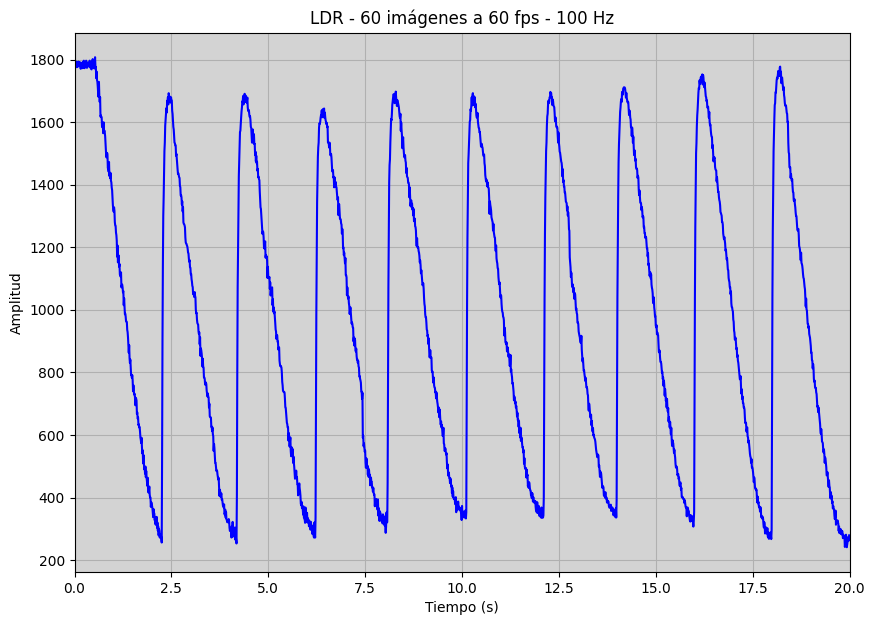

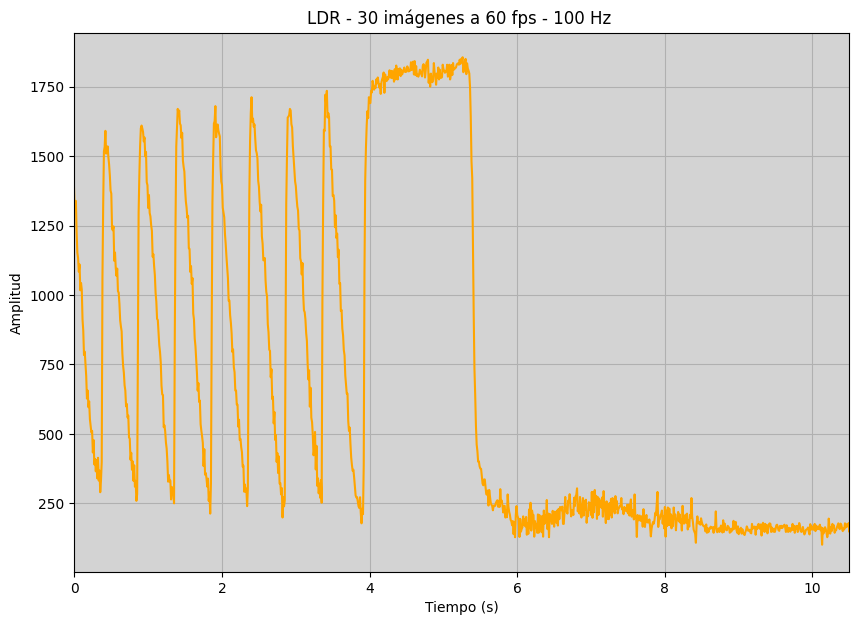

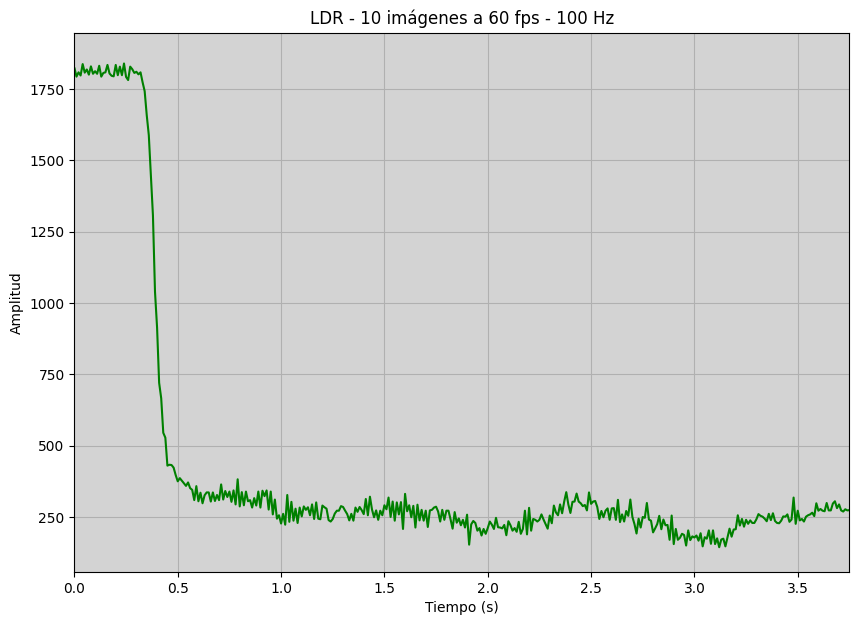

In [179]:
# Parámetros
fs = 100  # frecuencia de muestreo [Hz]
tc1 = 12  # tiempo de corte 1 [segundos]
tc2 = 32  # tiempo de corte 2 [segundos]
t1 = tc1 * fs  # número de muestra en t = tc1 [muestras]
t2 = tc2 * fs  # número de muestra en t = tc2 [muestras]

# Acotamos la primera señal
ldr_acot = ldr_fs100Hz_60imgs_60fps[t1:t2]  # tramo útil de la señal
t_acot = np.arange(len(ldr_acot)) / fs  # recalculamos el vector de tiempo

# Ajustar el tiempo del primer gráfico para que comience en 0
t_acotado_0 = t_acot - t_acot[0]

# Función para graficar (debe estar definida previamente)
def graficar_t_VS_muestras(t, señal, xlabel, xlim, ylabel, titulo, grid, color='blue'):
    plt.figure(figsize=(10, 7))
    plt.plot(t, señal, color=color)  # Añadir el parámetro de color
    plt.gca().set_facecolor('lightgrey')
    plt.xlabel(xlabel)
    plt.xlim(xlim)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)
    plt.show()

# Graficar la primera señal ajustada al tiempo 0
graficar_t_VS_muestras(t_acotado_0,
                       ldr_acot,
                       xlabel='Tiempo (s)',
                       xlim=(0, tc2 - tc1),  # ajustar los límites de x
                       ylabel='Amplitud',
                       titulo='LDR - 60 imágenes a 60 fps - 100 Hz',
                       grid=True,
                       color='blue'  # Línea azul
                       )

# Graficar la segunda señal ajustada al tiempo 0
t_acotado_3 = tiempos[3] - 9.5  # restar el valor inicial de xlim al tiempo
graficar_t_VS_muestras(t_acotado_3,
                       seniales[3],
                       xlabel='Tiempo (s)',
                       xlim=(0, 10.5),  # ajustado a tiempo 0
                       ylabel='Amplitud',
                       titulo='LDR - 30 imágenes a 60 fps - 100 Hz ',
                       grid=True,
                       color='orange'
                       )

# Graficar la tercera señal ajustada al tiempo 0
t_acotado_5 = tiempos[5] - 9.25  # restar el valor inicial de xlim al tiempo
graficar_t_VS_muestras(t_acotado_5,
                       seniales[5],
                       xlabel='Tiempo (s)',
                       xlim=(0, 3.75),  # ajustado a tiempo 0
                       ylabel='Amplitud',
                       titulo='LDR - 10 imágenes a 60 fps - 100 Hz',
                       grid=True,
                       color='green'
                       )

Se puede observar que a 60 imágenes-60 fps, la señal tiene una duración de 20 segundos, pero al ir disminuyendo la cantidad de imágenes, también se va a modificar la duración de la señal.

Esto claramente también ocurre con las otras dos señales. Para la de 30 imágenes-60 fps, se puede observar que la duración de la señal se redujo exactamente a la mitad. Para la señal de 10 imágenes-60 fps la duración máxima fue de 3,5 segundos aproximadamente (casi un tercio de la duración de la señal 30 imágenes-60 fps).

Tambien es importante destacar que la secuencia del video del cual se tomó la señal, va de blanco hacia negro 10 veces. Esto va a afectar visualmente porque vamos a notar un gráfico tipo “diente de sierra”, donde cada pico superior puede analizarse como el inicio de la repetición, y cada pico inferior puede analizarse como el final de la repetición.

## Graficamos las muestras tomadas a Fs = 500 Hz

Una señal se va a poder descomponer en tantas componentes como la transformada de Fourier que se le calcule. Cuanta mayor cantidad de muestras, se va a contar con mayor resolución. Esto es ideal para poder detectar variación de frecuencias bajas.

4950
2500
900


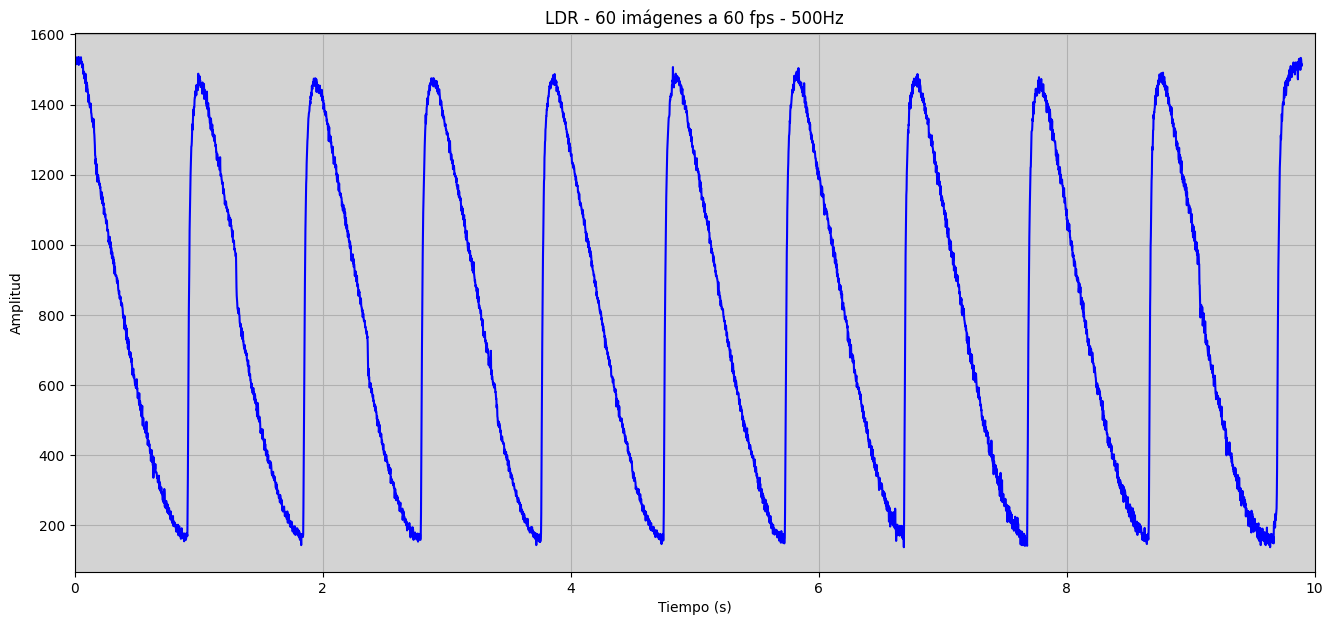

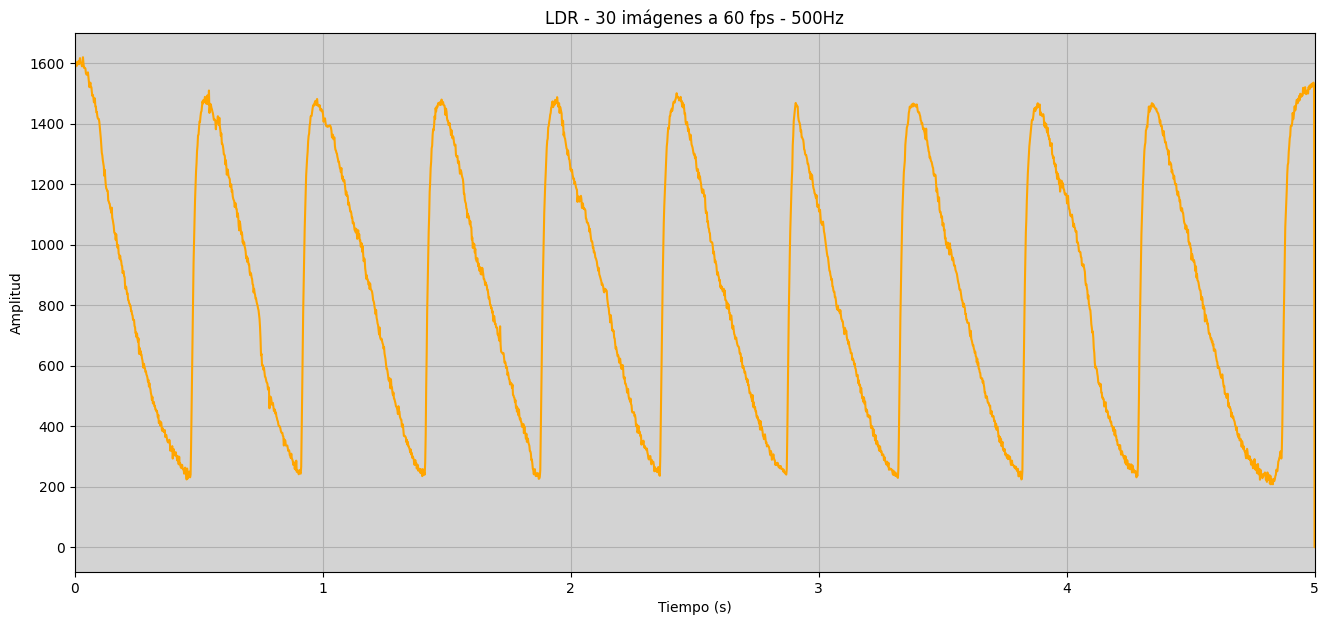

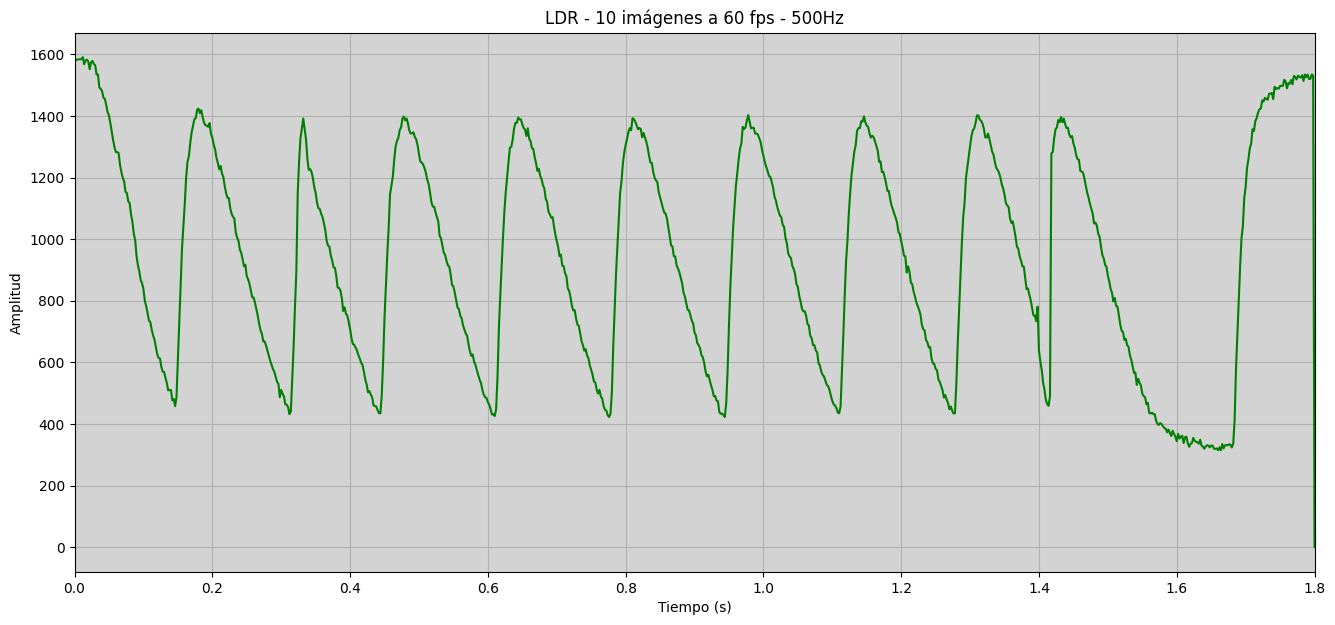

In [180]:
# Seniales a utilizar
seniales_utiles = [ldr_fs500Hz_60imgs_60fps, ldr_fs500Hz_30imgs_60fps, ldr_fs500Hz_10imgs_60fps]

# Frecuencia de muestreo
fs = 500

# Intervalo de tiempo
delta_t = 1/fs

"""# Graficar la señal
plt.figure(figsize=(10, 4))
plt.plot(seniales_utiles[2], label='LDR Signal')
plt.title('Señal del LDR')
plt.xlabel('Número de muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()"""

# Recortamos en un determinado numero de muestra la señal

seniales_utiles[0] = seniales_utiles[0][2000:6950]
seniales_utiles[1] = seniales_utiles[1][2400:4900]
seniales_utiles[2] = seniales_utiles[2][2000:2900]

"""# Graficamos la senial recortada
plt.figure(figsize=(10, 4))
plt.plot(seniales_utiles[2], label='LDR Signal')
plt.title('Señal del LDR')
plt.xlabel('Número de muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()"""

# Longitud seniales
print(len(seniales_utiles[0]))
print(len(seniales_utiles[1]))
print(len(seniales_utiles[2]))

# Array de tiempos correspondientes a cada senial
t = np.arange(0, len(seniales_utiles[2])*delta_t, delta_t)

# Encontrar la senial que posee mayor longitud
max_length = max(len(seniales_utiles[0]), len(seniales_utiles[1]), len(seniales_utiles[2]))

# Rellenamos las señales más cortas con ceros
seniales_utiles[0] = np.pad(seniales_utiles[0], (0, max_length - len(seniales_utiles[0])), 'constant')
seniales_utiles[1] = np.pad(seniales_utiles[1], (0, max_length - len(seniales_utiles[1])), 'constant')
seniales_utiles[2] = np.pad(seniales_utiles[2], (0, max_length - len(seniales_utiles[2])), 'constant')

t = np.arange(0, max_length * delta_t, delta_t)


# Función para graficar (debe estar definida previamente)
def graficar_t_VS_muestras2(t, señal, xlabel, xlim, ylabel, titulo, grid, color='blue'):
    plt.figure(figsize=(16, 7))
    plt.plot(t, señal, color=color)  # Añadir el parámetro de color
    plt.gca().set_facecolor('lightgrey')
    plt.xlabel(xlabel)
    plt.xlim(xlim)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)
    plt.show()

# Graficar la primera señal ajustada al tiempo 0
graficar_t_VS_muestras2(t,
                       seniales_utiles[0],
                       xlabel='Tiempo (s)',
                       xlim=(0, 10),  # ajustar los límites de x
                       ylabel='Amplitud',
                       titulo='LDR - 60 imágenes a 60 fps - 500Hz',
                       grid=True,
                       color='blue'  # Línea azul
                       )

# Graficar la segunda señal ajustada al tiempo 0
t_acotado_3 = tiempos[3] - 9.5  # restar el valor inicial de xlim al tiempo
graficar_t_VS_muestras2(t,
                       seniales_utiles[1],
                        xlabel='Tiempo (s)',
                       xlim=(0, 5),  # ajustado a tiempo 0
                       ylabel='Amplitud',
                       titulo='LDR - 30 imágenes a 60 fps - 500Hz',
                       grid=True,
                       color='orange'
                       )

# Graficar la tercera señal ajustada al tiempo 0
t_acotado_5 = tiempos[5] - 9.25  # restar el valor inicial de xlim al tiempo
graficar_t_VS_muestras2(t,
                       seniales_utiles[2],
                       xlabel='Tiempo (s)',
                       xlim=(0, 1.8),  # ajustado a tiempo 0
                       ylabel='Amplitud',
                       titulo='LDR - 10 imágenes a 60 fps - 500Hz',
                       grid=True,
                       color='green'
                       )



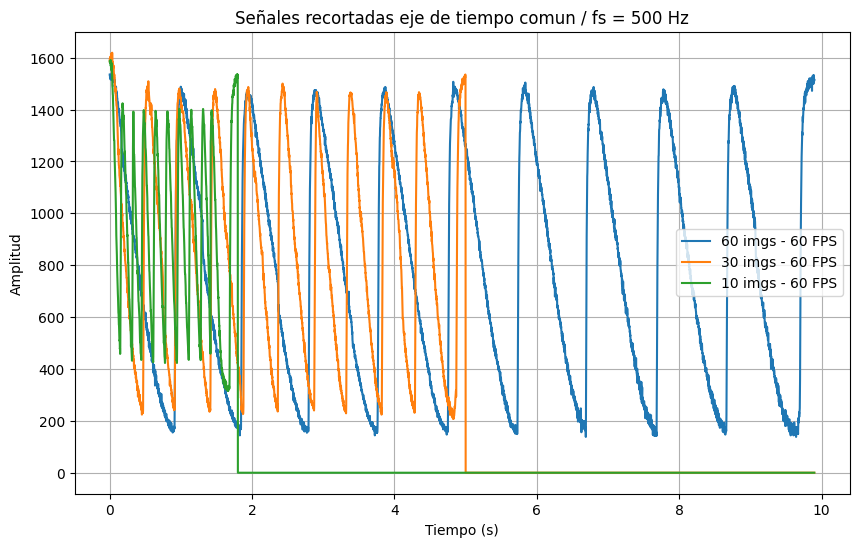

In [181]:
# Graficar las señales en un solo gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, seniales_utiles[0], label='60 imgs - 60 FPS')
plt.plot(t, seniales_utiles[1], label='30 imgs - 60 FPS')
plt.plot(t, seniales_utiles[2], label='10 imgs - 60 FPS')

# Etiquetas y leyendas
plt.title('Señales recortadas eje de tiempo comun / fs = 500 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

La duración del video esta relacionada con la siguiente fórmula:

Duración = Cantidad de imagenes / Cantidad de FPS

Tambien es importante contemplar que cada "diente" de la señal representa una reprodución completa de la secuencia. Esta secuencia, por programa esta configurada para reproducirse 10 veces (total de 10 "dientes").

De esta manera se puede observar como logicamente, esta relación matemática se respeta con las selañes de 30 imagenes - 60 fps y 10 imagenes - 60 fps.

# Transformada de Fourier

Se aplica la transformada de Fourier a las 3 señales (a 500Hz) para poder analizar que es lo que ocurre con sus frecuencias, cuales son sus compontentes frecuenciales y a que se deben. Recordamos que la transformada de fourier convierte la señal del dominio del tiempo al dominio de la frecuencia. Los parámetros que se tienen en cuenta para realizar la transformada de Fourier son: Fs (frecuencia de muestreo) y la señal (a la que se le desea aplicar la FFT).
En este caso, es necesario aplicarlo a las 3 señales porque entre sí se diferencian por la cantidad de imágenes que poseen. Esto puede afectar a las componentes frecuenciales.

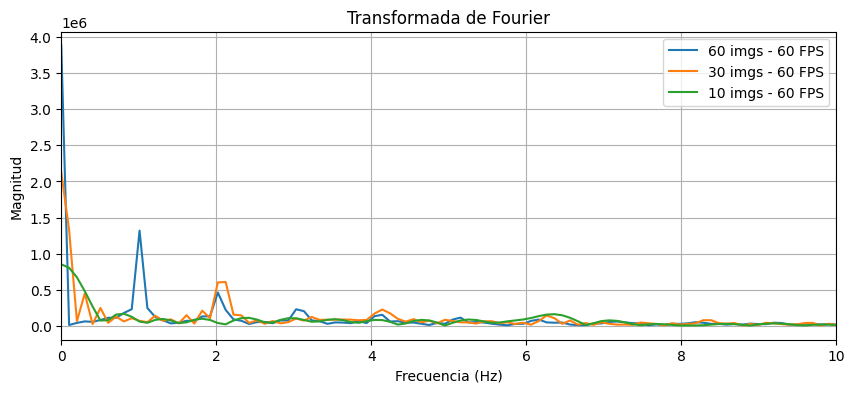

In [182]:
# Calculamos FFT de ka senial
"""
fft(seniales_utiles[0],
    fs,
    xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT - 60 imgs - 60 FPS',
    grid=True)
fft(seniales_utiles[1],
    fs,
    xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT - 30 imgs - 60 FPS',
    grid=True)
fft(seniales_utiles[2],
    fs,
    xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT - 20 imgs - 60 FPS',
    grid=True)
"""
freqs, mags = fft(seniales_utiles,
                  fs,
                  labels = ['60 imgs - 60 FPS', '30 imgs - 60 FPS', '10 imgs - 60 FPS'],
                  xlim=(0,10),
                  ylim=None)


***Análisis del gráfico FFT***  
1. Podemos apreciar un pico cerca de la frecuencia de 0 Hz, esto puede representar la parte casi-contínua que obtuvimos antes y después de la muestra como tal.  
2. Es posible visualizar que, existe una frecuencia fundamental en 1 Hz y lugo le suceden sus respectivos armónicos cada un Hert.

# Calculo de media y energía

Teorema de Parseval

El Teorema de Parseval establece que la energía total de una señal en el dominio del tiempo es igual a la energía total de esa misma señal en el dominio de la frecuencia.

$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$

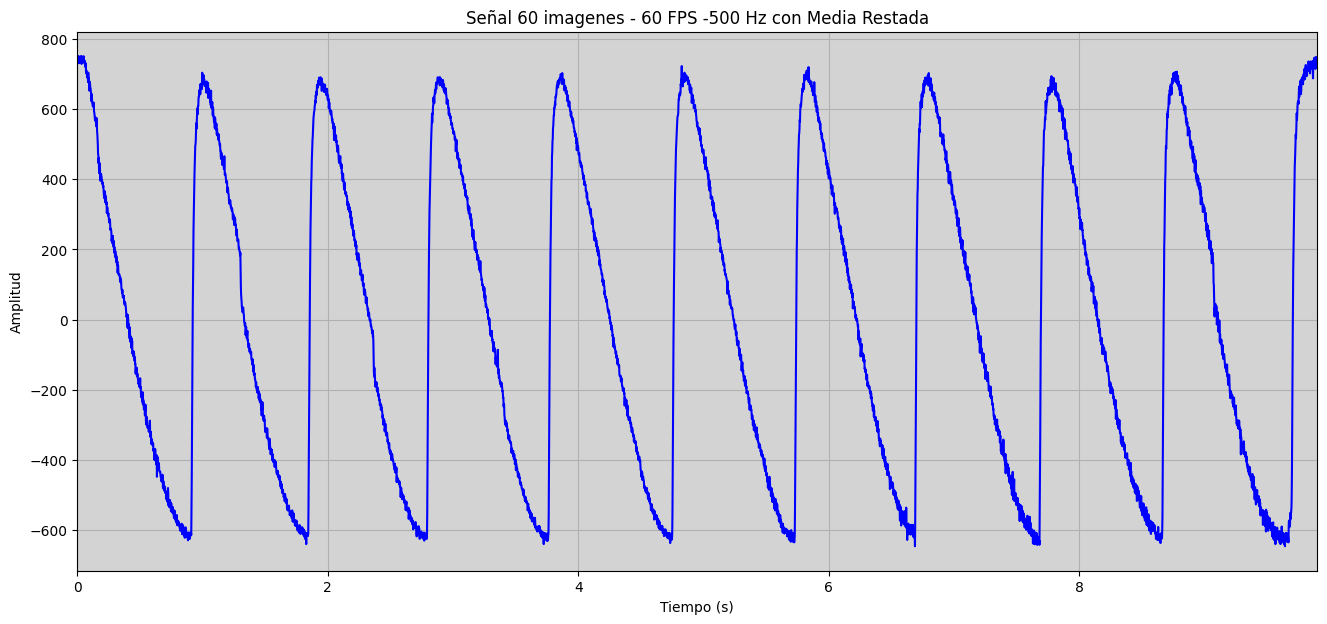

Energia en el dominio del tiempo: 1028867891.3737375
Energia en el dominio de las frecuencias: 1028867891.3737372
La energía acumulada al 90% está en la frecuencia: 2.8282828282828283
La energia acumulada es: 928562496.4653705


In [183]:
# Calcular la media de la señal ldr_fs500Hz_60imgs_60fps
media_senial = np.mean(seniales_utiles[0])

# Restar la media de la señal
seniales_utiles[0] = seniales_utiles[0] - media_senial

# Graficar la señal con la media restada
graficar_t_VS_muestras2(t, seniales_utiles[0], 'Tiempo (s)', [0, max_length * delta_t], 'Amplitud', 'Señal 60 imagenes - 60 FPS -500 Hz con Media Restada', True)
"""
# Este comentario en Rojo hay que revisar el codigo

# Calcular la Transformada de Fourier de la señal
fft_senial = np.fft.fft(seniales_utiles[0])

# Calcular la magnitud del espectro de frecuencias
magnitud_fft = np.abs(fft_senial)

# Solo tomamos la mitad positiva del espectro
frecuencias = np.fft.fftfreq(len(seniales_utiles[0]), delta_t)
frecuencias_positivas = frecuencias[:len(frecuencias)//2]
magnitud_fft_positiva = magnitud_fft[:len(magnitud_fft)//2]

# Calcular la energía en el dominio de la frecuencia
energia_frecuencia = np.sum(magnitud_fft_positiva**2) / len(magnitud_fft_positiva)

print(f"Energía en el dominio de la frecuencia: {energia_frecuencia}")

# Graficar el espectro de frecuencias en el rango de 0 a 10 Hz
plt.figure(figsize=(10, 4))
plt.plot(frecuencias_positivas, magnitud_fft_positiva)
plt.title('Espectro de Frecuencias (0 a 50 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 10)
plt.grid(True)
plt.show()"""

# Calcular la energía de la señal en el dominio del tiempo
energy_temp = calcular_energia_dom_temp(seniales_utiles[0])
print(f"Energia en el dominio del tiempo: "+ str(energy_temp))

# Calcular la Transformada de Fourier de la señal
fft_senial = abs(np.fft.fft(seniales_utiles[0]))

# Calcular la energía de la señal en el dominio de la frecuencia
energy_freq = calcular_energia_dom_freq(fft_senial) # hay que pasarle la fft en crudo
print(f"Energia en el dominio de las frecuencias: "+ str(energy_freq))

"""Ä partir de aca REVISAR POR ALEX"""
# Calcula la frecuencia donde cae el 90% de la energía acumulada
frec_90, sum_energy = calc_frec_acum_energ(90, energy_freq, freqs, mags)
print(f"La energía acumulada al 90% está en la frecuencia: {frec_90}\nLa energia acumulada es: {sum_energy}")

# Aplicación de filtro FIR Pasa-bajo

Los filtros FIR son de respuesta finita al impulso. Tienen la particularidad de solo depender de la muestra actual y las anteriores, es decir, no necesita realimentacion de la salida.  
Es posble convolucionar los coeficientes del filtro con la señal de entrada.

## Por método de la ventana de Hamming



El orden del filtro es:  636


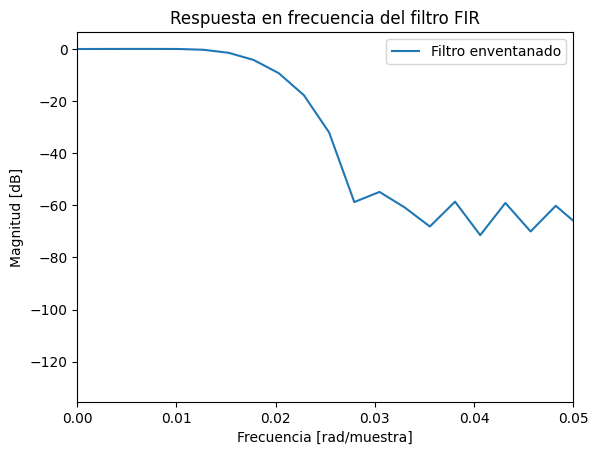

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal.windows import hamming

fc = 1.5  # Frecuencia de corte
fs = 500  # Frecuencia de muestreo
Adb = 0  # Ganancia del filtro en decibeles
N = len(freqs)  # Número de puntos de la FFT
BW = 0.5  # Ancho de banda en la banda de transición

# 1. Frecuencia de corte normalizada en radianes
wc = 2 * np.pi * fc / fs

# 2. Ancho de banda normalizado en radianes
bwn = 2 * np.pi * BW / fs

# 3. Orden estimado del filtro
M = int(4 / bwn)
print('El orden del filtro es: ', M)

# 4. Respuesta del filtro ideal h1[n]
n = np.arange(-M, M)
h1 = wc / np.pi * np.sinc(wc * n / np.pi)  # Filtro pasabajas, recuerde cambiar cuando pasaaltas, pasabanda, o rechazabanda
w1, Hh1 = signal.freqz(h1, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro ideal

# 5. Truncamiento de frecuencia en el origen h1[0]
# Para el caso del filtro pasabajas no se debe aplicar

# 6. Generación de la ventana para eliminar el fenómeno de Gibbs
win = hamming(len(n))

# 7. Multiplico la respuesta ideal por la ventana
h2 = h1 * win

# 8. Ganancia del filtro
A = np.sqrt(10**(0.1 * Adb))
h2 = h2 * A  # Ganancia del filtro
w2, Hh2 = signal.freqz(h2, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro enventanado

u = np.ones_like(n)  # Escalón
un = np.convolve(u, h2, mode='full')  # Respuesta al escalón

# Graficar la respuesta en frecuencia del filtro
plt.figure()
plt.plot(w2, 20 * np.log10(abs(Hh2)), label='Filtro enventanado')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim(0,0.05)
plt.ylabel('Magnitud [dB]')
plt.title('Respuesta en frecuencia del filtro FIR')
plt.legend()
plt.show()


$w=2.pi.f/fs$
en nuestro caso

In [185]:
fc = 3
fs = 500
w = 2*np.pi*fc/fs
print(f"Frecuecnia transformada a omega: {w}")

Frecuecnia transformada a omega: 0.03769911184307752


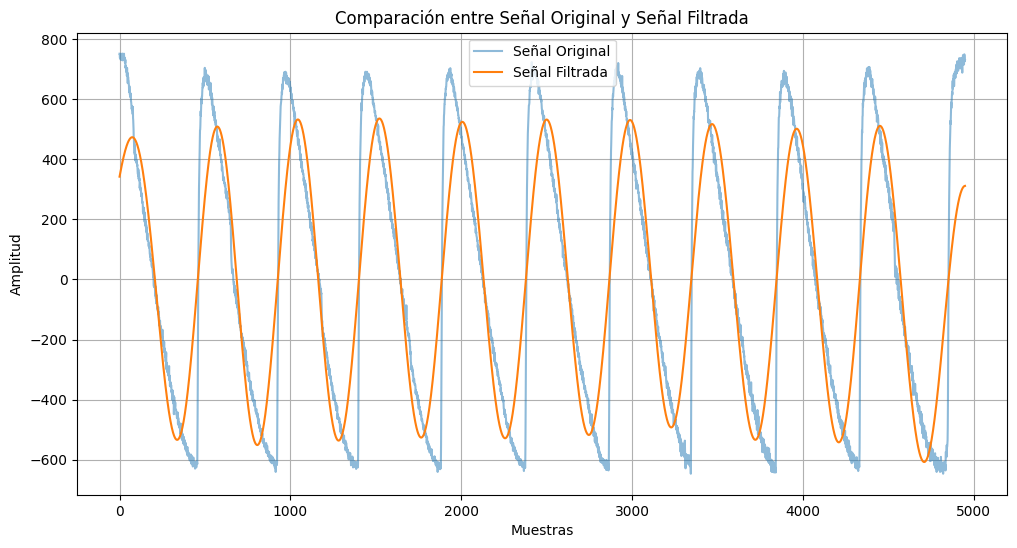

In [186]:
# Aplicar la convolución
senial_filtrada = np.convolve(seniales_utiles[0], h2, mode='same')

# Crear la figura con un tamaño específico
plt.figure(figsize=(12, 6))

# Graficar la señal original con transparencia
plt.plot(seniales_utiles[0], alpha=0.5, label='Señal Original')  # Ajusta alpha aquí
plt.plot(senial_filtrada, label='Señal Filtrada')
plt.legend()
plt.title('Comparación entre Señal Original y Señal Filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

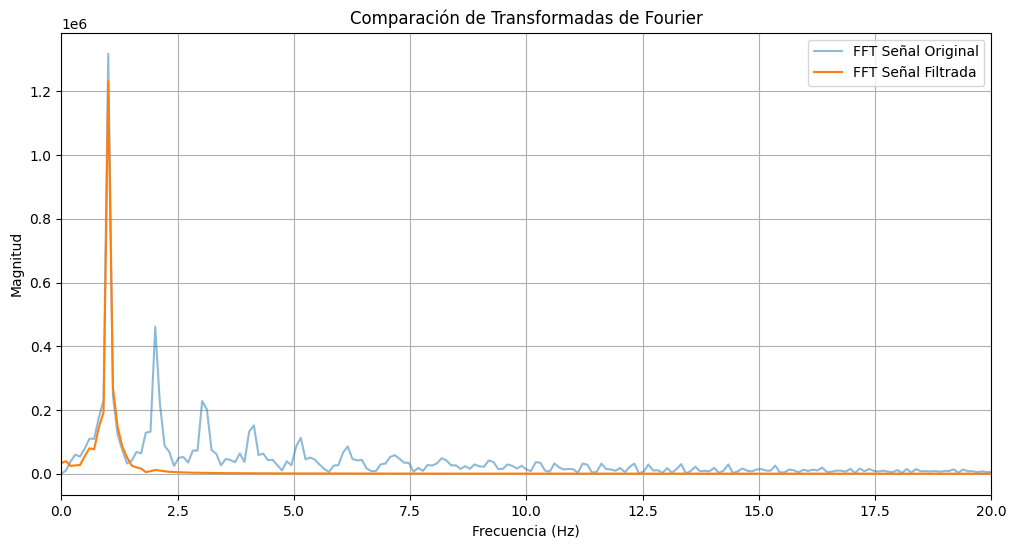

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Supongamos que ya tienes tus señales: seniales_utiles[0] y senial_filtrada
# Aplicar la convolución
senial_filtrada = np.convolve(seniales_utiles[0], h2, mode='same')

# Calcular la FFT de ambas señales
N = len(seniales_utiles[0])  # Número de muestras
fs = 500  # Frecuencia de muestreo (ajusta según corresponda)

# FFT de la señal original
fft_original = fft(seniales_utiles[0])
# FFT de la señal filtrada
fft_filtrada = fft(senial_filtrada)

# Obtener las frecuencias correspondientes
freqs = fftfreq(N, 1/fs)

# Seleccionar solo las frecuencias positivas
pos_mask = freqs >= 0
freqs_pos = freqs[pos_mask]
fft_original_pos = np.abs(fft_original[pos_mask])  # Magnitud
fft_filtrada_pos = np.abs(fft_filtrada[pos_mask])  # Magnitud

# Crear la figura con un tamaño específico
plt.figure(figsize=(12, 6))

# Graficar la FFT de la señal original
plt.plot(freqs_pos, fft_original_pos, alpha=0.5, label='FFT Señal Original')  # Ajusta alpha aquí
# Graficar la FFT de la señal filtrada
plt.plot(freqs_pos, fft_filtrada_pos, label='FFT Señal Filtrada')

# Configuraciones del gráfico
plt.title('Comparación de Transformadas de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.legend()
plt.xlim(0, 20)  # Limitar el eje x a la mitad de la frecuencia de muestreo
plt.show()


Nota: Se agrega info de cada filtro para luego decidir cual utilizar.

Filtro Pasa Bajos por Método de Ventana de Hamming
**texto en negrita**

*Diseño FIR (Finite Impulse Response):*
Este filtro se diseña utilizando la técnica de ventaneo, específicamente la ventana de Hamming, para suavizar la respuesta del filtro3.


*Reducción del fenómeno de Gibbs:*
La ventana de Hamming ayuda a reducir las ondulaciones en la banda de rechazo, conocidas como fenómeno de Gibbs3.


*Respuesta en frecuencia:*
La respuesta en frecuencia muestra una transición suave entre la banda de paso y la banda de rechazo, con mínimas ondulaciones3.


*Aplicaciones:*
Utilizado en aplicaciones donde se requiere una respuesta de fase lineal y estabilidad, como en procesamiento de señales y comunicaciones3.

## Por método de Butterworth

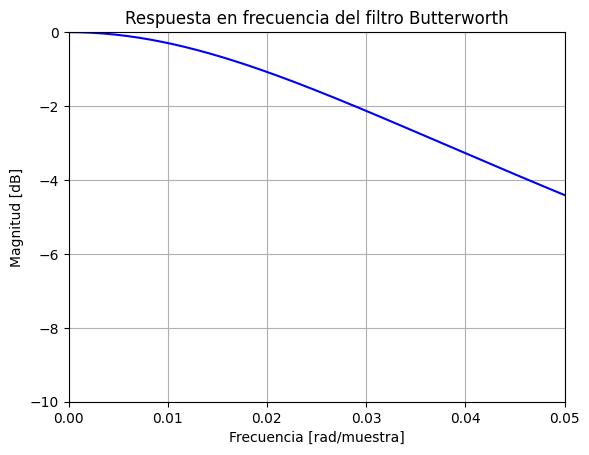

In [188]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Definir la frecuencia de muestreo y la frecuencia de corte
fs = 500  # Frecuencia de muestreo en Hz
fc = 3  # Frecuencia de corte en Hz

# Calcular los coeficientes del filtro Butterworth
b, a = signal.butter(1, fc / (fs / 2), btype='low')

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, worN=8000)

# Graficar la respuesta en frecuencia en radianes por muestra
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia del filtro Butterworth')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim(0,0.05)
plt.ylabel('Magnitud [dB]')
plt.ylim(-10,0)
plt.grid()
plt.show()


Nota: Se agrega info de cada filtro para luego decidir cual utilizar.


**Filtro Pasa Bajos Butterworth**


*Respuesta en frecuencia plana en la banda de paso:*
El filtro Butterworth es conocido por su respuesta en frecuencia plana en la banda de paso, lo que minimiza la distorsión de la señal1.


*Atenuación suave hacia la banda de rechazo:*
La transición entre la banda de paso y la banda de rechazo es suave, lo que evita cambios bruscos en la señal2.


*Orden del filtro:*
El orden del filtro determina la pendiente de la atenuación. Un filtro de orden más alto tendrá una transición más abrupta entre la banda de paso y la banda de rechazo2.


*Aplicaciones:*
Se utiliza en procesamiento de señales digitales, comunicaciones y electrónica de audio

#Bibliografía

https://www.luisllamas.es/medir-nivel-luz-con-arduino-y-fotoresistencia-ldr/